In [23]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

def read_jsonl(file_path):
    data = []
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            data.append(json.loads(line.strip()))
    return pd.DataFrame(data)

def read_csv(file_path):
    return pd.read_csv(file_path)

jsonl_file = 'merged.jsonl'
csv_file = 'merged.csv'

df_questions = read_jsonl(jsonl_file)
df_info = read_csv(csv_file)

df_merged = pd.merge(df_questions, df_info, left_index=True, right_index=True)


In [58]:
from sklearn.model_selection import train_test_split

train_ratio = 0.8
valid_ratio = test_ratio = 0.1

train_valid, test = train_test_split(df_merged, test_size=test_ratio, random_state=42)
train, valid = train_test_split(train_valid, test_size=valid_ratio/(1-test_ratio), random_state=42)

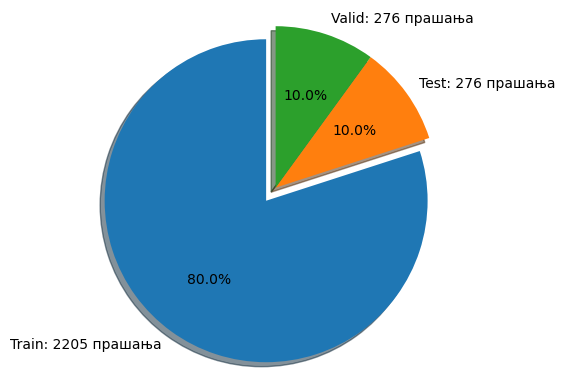

In [76]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

train_ratio = 0.8
valid_ratio = test_ratio = 0.1

train_valid, test = train_test_split(df_merged, test_size=test_ratio, random_state=42)
train, valid = train_test_split(train_valid, test_size=valid_ratio/(1-test_ratio), random_state=42)

def create_pie_chart_sizes(train, test, valid):
    labels = [f'Train: {len(train)} прашања', f'Test: {len(test)} прашања', f'Valid: {len(valid)} прашања']
    sizes = [len(train), len(test), len(valid)]

    fig, ax = plt.subplots()
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, shadow=True, explode=(0.1, 0, 0))
    ax.axis('equal')  
    plt.show()

create_pie_chart_sizes(train, test, valid)


In [77]:
train_data = train[['source', 'year', 'type', 'qid', 'question', 'answerKey', 'explanation', 'statements']]

with open('train.jsonl', 'w', encoding='utf-8') as f:
    for idx, row in train_data.iterrows():
        json.dump(row.to_dict(), f, ensure_ascii=False)
        f.write('\n')


In [78]:
test_data = test[['source', 'year', 'type', 'qid', 'question', 'answerKey', 'explanation', 'statements']]

with open('test.jsonl', 'w', encoding='utf-8') as f:
    for idx, row in test_data.iterrows():
        json.dump(row.to_dict(), f, ensure_ascii=False)
        f.write('\n')


In [79]:
valid_data = valid[['source', 'year', 'type', 'qid', 'question', 'answerKey', 'explanation', 'statements']]

with open('valid.jsonl', 'w', encoding='utf-8') as f:
    for idx, row in valid_data.iterrows():
        json.dump(row.to_dict(), f, ensure_ascii=False)
        f.write('\n')


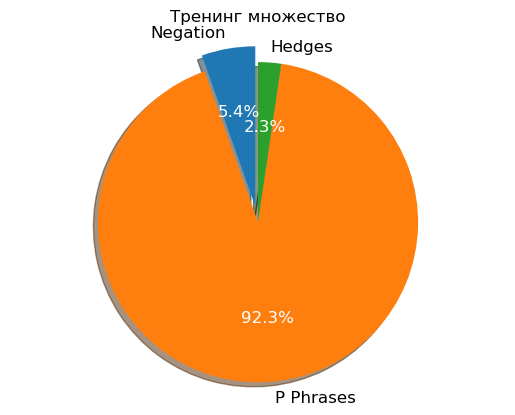

In [85]:
import matplotlib.pyplot as plt

def create_pie_chart(df, title):
    labels = ['Negation', 'P Phrases', 'Hedges']
    sizes = [
        df['negation'].sum(),
        df['p_phrases'].sum(),
        df['hedge'].sum()
    ]
    total = sum(sizes)
    percentages = [(size / total) * 100 for size in sizes]

    fig, ax = plt.subplots()
    wedges, texts, autotexts = ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, shadow=True, explode=(0.1, 0, 0))
    ax.axis('equal') 

    for text in texts:
        text.set_color('black')
        text.set_fontsize(12)
    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontsize(12)
    
    ax.set_title(title)
    plt.show()

create_pie_chart(train, 'Тренинг множество')


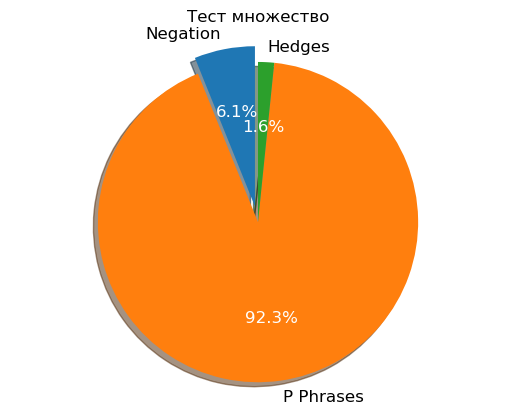

In [86]:
import matplotlib.pyplot as plt

def create_pie_chart(df, title):
    labels = ['Negation', 'P Phrases', 'Hedges']
    sizes = [
        df['negation'].sum(),
        df['p_phrases'].sum(),
        df['hedge'].sum()
    ]
    total = sum(sizes)
    percentages = [(size / total) * 100 for size in sizes]

    fig, ax = plt.subplots()
    wedges, texts, autotexts = ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, shadow=True, explode=(0.1, 0, 0))
    ax.axis('equal') 

    for text in texts:
        text.set_color('black')
        text.set_fontsize(12)
    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontsize(12)
    
    ax.set_title(title)
    plt.show()

create_pie_chart(test, 'Тест множество')


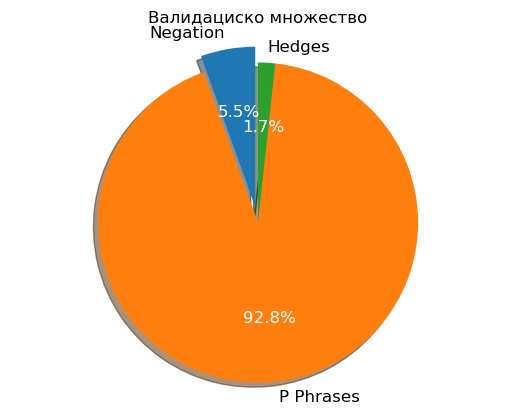

In [87]:
import matplotlib.pyplot as plt

def create_pie_chart(df, title):
    labels = ['Negation', 'P Phrases', 'Hedges']
    sizes = [
        df['negation'].sum(),
        df['p_phrases'].sum(),
        df['hedge'].sum()
    ]
    total = sum(sizes)
    percentages = [(size / total) * 100 for size in sizes]

    fig, ax = plt.subplots()
    wedges, texts, autotexts = ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, shadow=True, explode=(0.1, 0, 0))
    ax.axis('equal') 

    for text in texts:
        text.set_color('black')
        text.set_fontsize(12)
    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontsize(12)
    
    ax.set_title(title)
    plt.show()

create_pie_chart(valid, 'Валидациско множество')


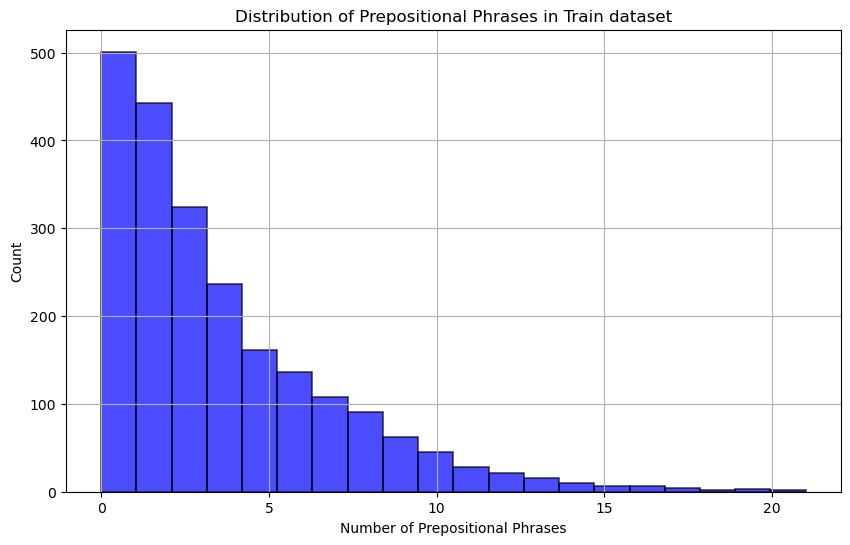

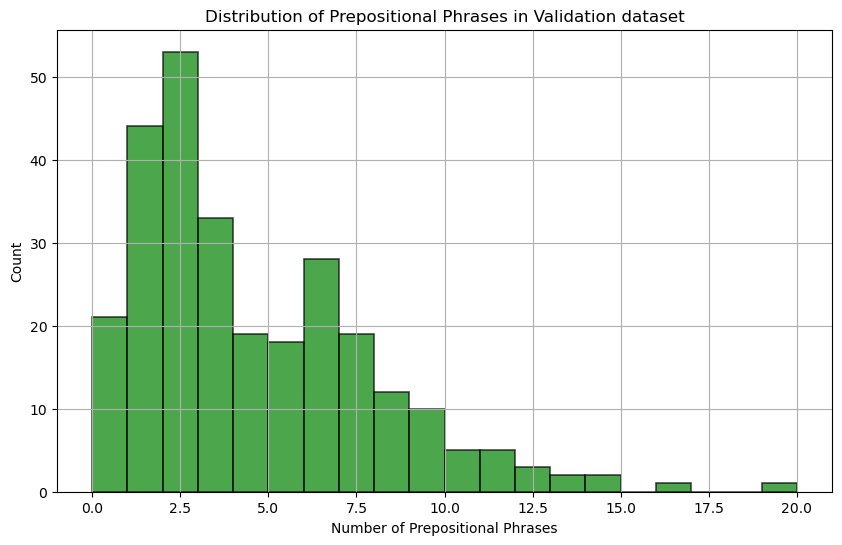

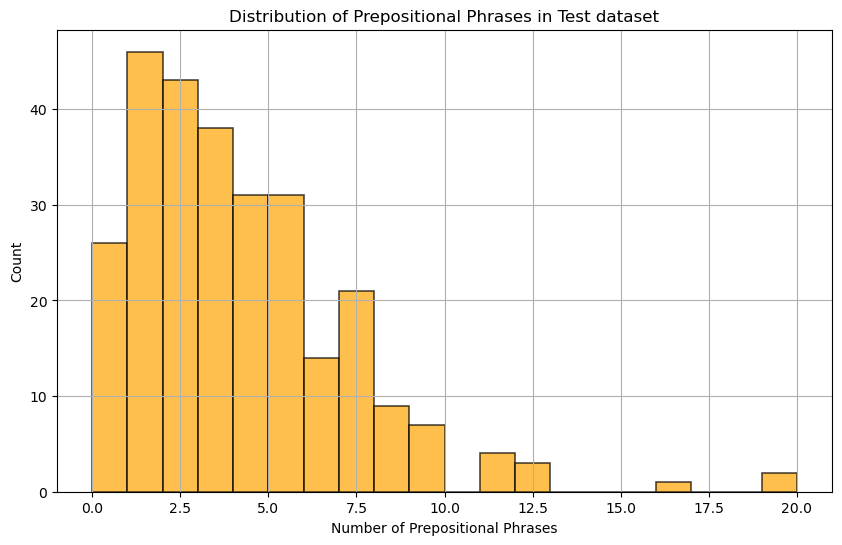

In [68]:
import matplotlib.pyplot as plt

def create_histogram(df, subset_name, color):
    plt.figure(figsize=(10, 6))
    plt.hist(df['p_phrases'], bins=20, color=color, alpha=0.7, edgecolor='black', linewidth=1.2)
    plt.title(f'Distribution of Prepositional Phrases in {subset_name} dataset')
    plt.xlabel('Number of Prepositional Phrases')
    plt.ylabel('Count')
    plt.grid(True)
    plt.show()

create_histogram(train, 'Train', 'blue')
create_histogram(valid, 'Validation', 'green')
create_histogram(test, 'Test', 'orange')


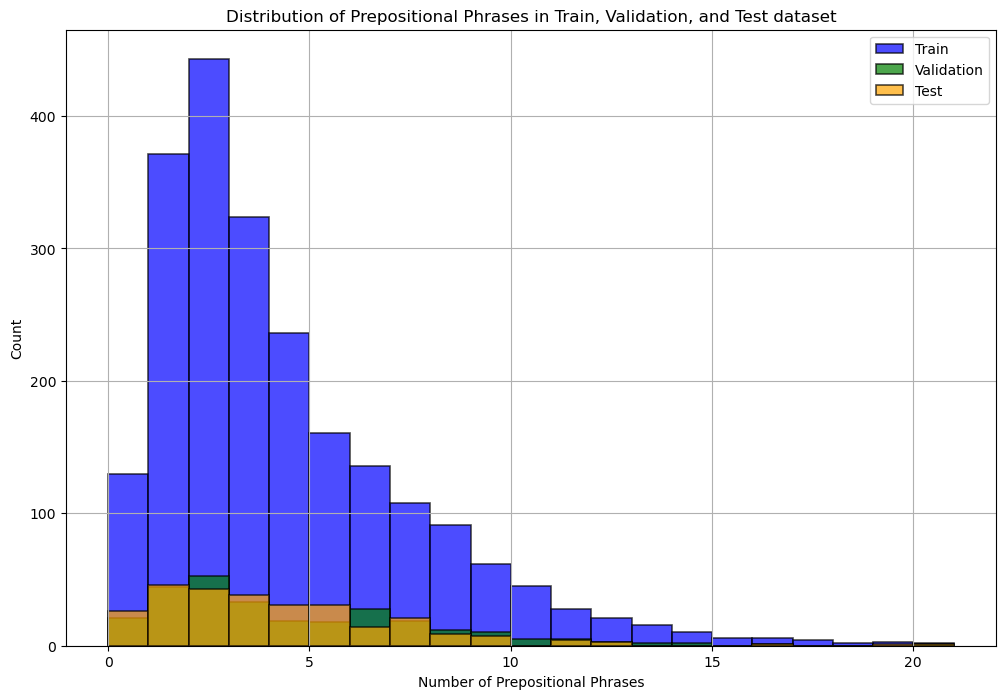

In [69]:
import matplotlib.pyplot as plt
import numpy as np

def create_histogram_combined(train_df, valid_df, test_df):
    plt.figure(figsize=(12, 8))
    
    bins = np.arange(0, max(train['p_phrases'].max(), valid['p_phrases'].max(), test['p_phrases'].max()) + 1, 1)
    
    plt.hist(train['p_phrases'], bins=bins, alpha=0.7, color='blue', edgecolor='black', linewidth=1.2, label='Train')
    plt.hist(valid['p_phrases'], bins=bins, alpha=0.7, color='green', edgecolor='black', linewidth=1.2, label='Validation')
    plt.hist(test['p_phrases'], bins=bins, alpha=0.7, color='orange', edgecolor='black', linewidth=1.2, label='Test')
    
    plt.legend()
    
    plt.title('Distribution of Prepositional Phrases in Train, Validation, and Test dataset')
    plt.xlabel('Number of Prepositional Phrases')
    plt.ylabel('Count')
    
    plt.grid(True)
    
    plt.show()

create_histogram_combined(train, valid, test)
